In [1]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def create_model():
 model = tf.keras.Sequential([
 tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(256, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10, activation='softmax')
 ])
 model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])
 return model

In [5]:
def train(model, x_train, y_train, x_test, y_test):
  history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    verbose=1)
  return history

In [9]:
model=create_model()
history=train(model, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8124 - loss: 0.6011 - val_accuracy: 0.9598 - val_loss: 0.1261
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9572 - loss: 0.1423 - val_accuracy: 0.9684 - val_loss: 0.1063
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9693 - loss: 0.0983 - val_accuracy: 0.9702 - val_loss: 0.0990
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9771 - loss: 0.0745 - val_accuracy: 0.9726 - val_loss: 0.0918
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9822 - loss: 0.0571 - val_accuracy: 0.9760 - val_loss: 0.0819
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9771 - val_loss: 0.0878
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9861 - loss: 0.0430 - val_accuracy: 0.9769 - val_loss: 0.0821
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9875 - loss: 0.0398 - val_

In [18]:
import numpy as np
from sklearn.metrics import classification_report
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



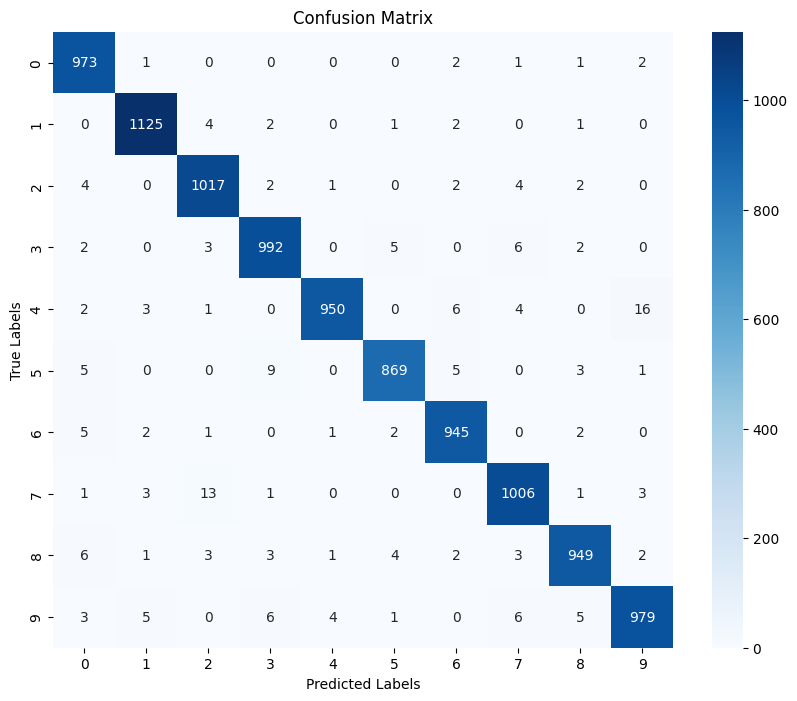

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()